# 株式データを観察する。

この章では `時系列データ` である株式データについて考えて行きます。

### 事前準備

[個別株価データ、株価推移・過去データ・無料CSVダウンロード | 株式投資メモ・株価データベース](https://kabuoji3.com/stock/)からお好きな銘柄を4つダウンロード




In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

stock0 = "/tmp/7201_2018.csv"
stock1 = "/tmp/6758_2018.csv"
stock2 = "/tmp/3436_2018.csv"
stock3 = "/tmp/8306_2018.csv"

df_stock0 = pd.read_csv(stock0, skiprows=[0], encoding='shift-jis', index_col="日付", parse_dates=True)
df_stock1 = pd.read_csv(stock1, skiprows=[0], encoding='shift-jis', index_col="日付", parse_dates=True)
df_stock2 = pd.read_csv(stock2, skiprows=[0], encoding='shift-jis', index_col="日付", parse_dates=True)
df_stock3 = pd.read_csv(stock3, skiprows=[0], encoding='shift-jis', index_col="日付", parse_dates=True)

df_stock_list = [df_stock0, df_stock1, df_stock2, df_stock3,]
stock_name_list = ["NISSAN", "SONY", "SUMCO", "MUFG",]

all_data = pd.concat(df_stock_list, 
                    keys=stock_name_list,
                    names=['Ticker', 'Date'])

df_close = all_data["終値調整値"].reset_index().pivot('Date', 'Ticker', '終値調整値')

In [2]:
# データ確認
df_close.tail()

Ticker,MUFG,NISSAN,SONY,SUMCO
Date,,,,
2018-11-08,684.8,1030.0,6259.0,1697.0
2018-11-09,685.4,1027.0,6248.0,1642.0
2018-11-12,680.0,1029.0,6056.0,1638.0
2018-11-13,666.5,1008.5,5893.0,1573.0
2018-11-14,676.3,1022.5,5853.0,1643.0


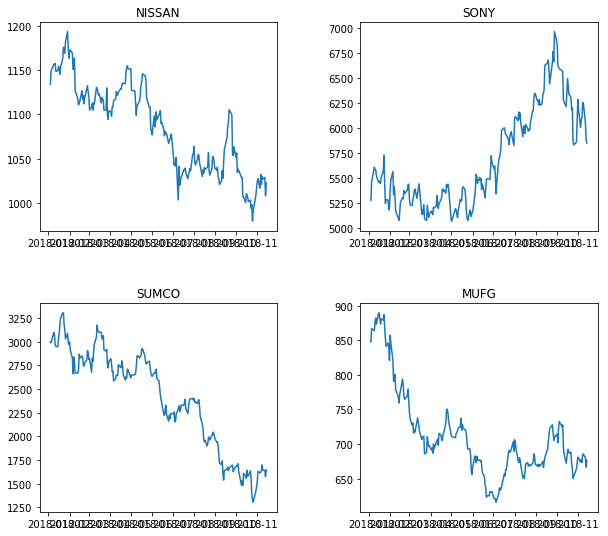

In [3]:
fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(df_close["NISSAN"])
ax2.plot(df_close["SONY"])
ax3.plot(df_close["SUMCO"])
ax4.plot(df_close["MUFG"])

ax1.set_title("NISSAN")
ax2.set_title("SONY")
ax3.set_title("SUMCO")
ax4.set_title("MUFG")

fig.subplots_adjust(wspace=0.35, hspace=0.35, bottom=0.2)


In [4]:
def myplot(df, tate_hako = 2, ):
    
    fig = plt.figure(figsize=(10,10))
    
    num = len(df.columns)
    x_box_num = tate_hako
    y_box_num = num / x_box_num
    
    for i, s in enumerate(df.columns):
        ax = fig.add_subplot(x_box_num, y_box_num, i+1)
        ax.plot(df.iloc[:, i])
        ax.grid()
        ax.set_title(df.columns[i])
        # x軸の rotate 方法、だれか教えて。。。
    
    fig.subplots_adjust(wspace=0.35, hspace=0.35, bottom=0.2)
    
    
    

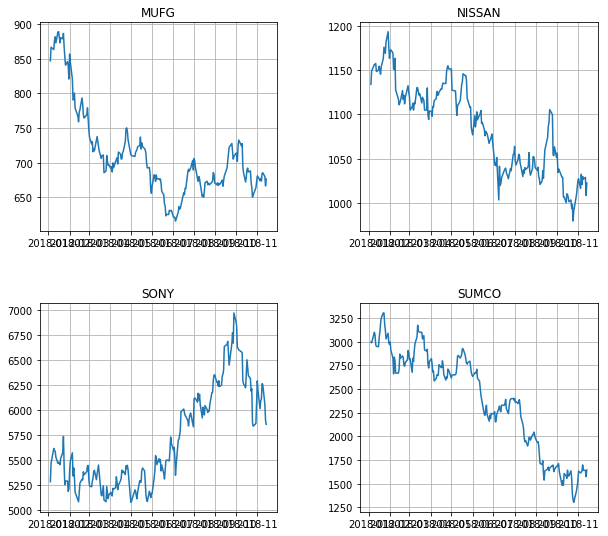

In [5]:
myplot(df_close, )


In [6]:
# 4つの株価についてサッと確認
df_close.describe()

Ticker,MUFG,NISSAN,SONY,SUMCO
count,213.000000,213.000000,213.000000,213.000000
mean,711.599061,1085.403286,5687.920188,2400.046948
std,63.521247,50.021087,477.085737,517.487916
min,615.600000,979.700000,5073.000000,1301.000000
25%,672.000000,1039.000000,5299.000000,1977.000000
50%,694.400000,1091.500000,5491.000000,2584.000000
75%,727.600000,1125.500000,6056.000000,2813.000000
max,889.300000,1193.500000,6966.000000,3305.000000


In [7]:
# この期間に置いて各銘柄の変動幅を確認
# Sony と SUMCOは方向は違うが、大体2000円くらい幅があるので同じ位の変動幅と思ってしまいがちだが
df_close.describe().loc["max"] / df_close.describe().loc["min"] - 1

Ticker
MUFG      0.444607
NISSAN    0.218230
SONY      0.373152
SUMCO     1.540354
dtype: float64

In [8]:
# 価格帯が違う株価を比べる場合は、「基準化」をする必要がある。
# 基準化その1
# データ取得日からの変化率を見る

df_close / df_close.loc["2018-01-04"]-1


Ticker,MUFG,NISSAN,SONY,SUMCO
Date,,,,
2018-01-04,0.000000,0.000000,0.000000,0.000000
2018-01-05,0.023256,0.013228,0.035045,-0.002336
2018-01-09,0.019242,0.019841,0.063080,0.034713
2018-01-10,0.035061,0.019841,0.059102,0.024700
2018-01-11,0.041081,0.020723,0.057776,-0.009680
2018-01-12,0.030693,0.012787,0.046600,-0.015020
2018-01-15,0.049227,0.014109,0.034855,-0.016021
2018-01-16,0.049817,0.018078,0.036939,0.014686
2018-01-17,0.039901,0.013668,0.034097,0.036382


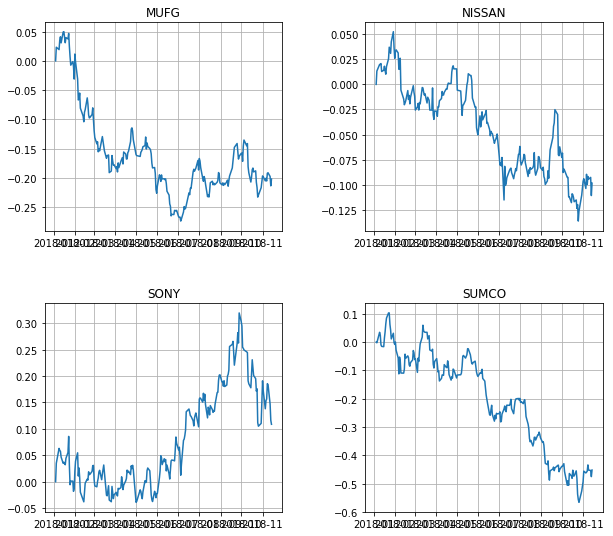

In [9]:
myplot(df_close / df_close.loc["2018-01-04"]-1, )

In [10]:
# この方法だと、分析期間が変わるたびに変更する必要がある。
# 期間全体における変動幅は見やすいが、日々の変動は見えにくい。

# 基準化その２
# 前日を基準とし毎日の収益率（＝変化率）を見る。

df_close.pct_change().head()


Ticker,MUFG,NISSAN,SONY,SUMCO
Date,,,,
2018-01-04,NaN,NaN,NaN,NaN
2018-01-05,0.023256,0.013228,0.035045,-0.002336
2018-01-09,-0.003922,0.006527,0.027086,0.037136
2018-01-10,0.015520,0.000000,-0.003742,-0.009677
2018-01-11,0.005817,0.000865,-0.001252,-0.033550


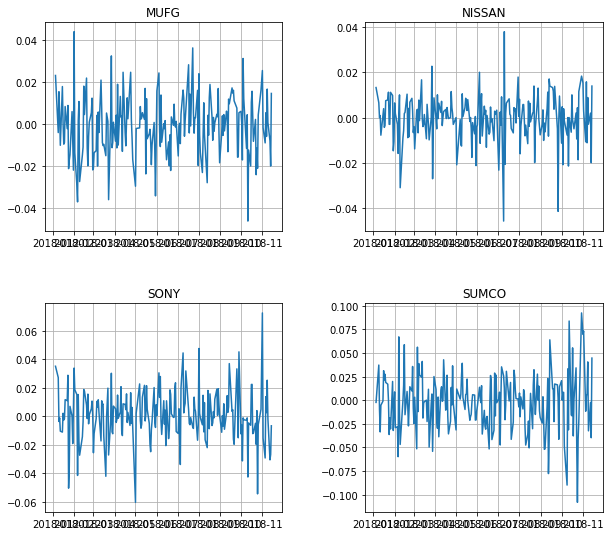

In [11]:
myplot(df_close.pct_change() )

In [12]:
## これだと、価格帯の違う株価を比べる事が出来ないので、対数化する。
## これを**対数化収益率** と呼ぶ
(df_close / df_close.shift(1)).apply(np.log).head()



Ticker,MUFG,NISSAN,SONY,SUMCO
Date,,,,
2018-01-04,NaN,NaN,NaN,NaN
2018-01-05,0.022990,0.013141,0.034444,-0.002339
2018-01-09,-0.003930,0.006506,0.026726,0.036463
2018-01-10,0.015401,0.000000,-0.003749,-0.009725
2018-01-11,0.005800,0.000864,-0.001253,-0.034126


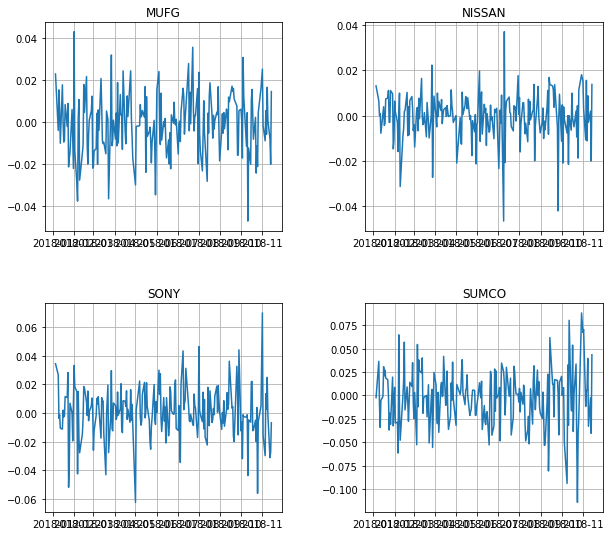

In [13]:
myplot((df_close / df_close.shift(1)).apply(np.log))
# 誰かsharey 教えて

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2473ed29e8>,
      dtype=object)

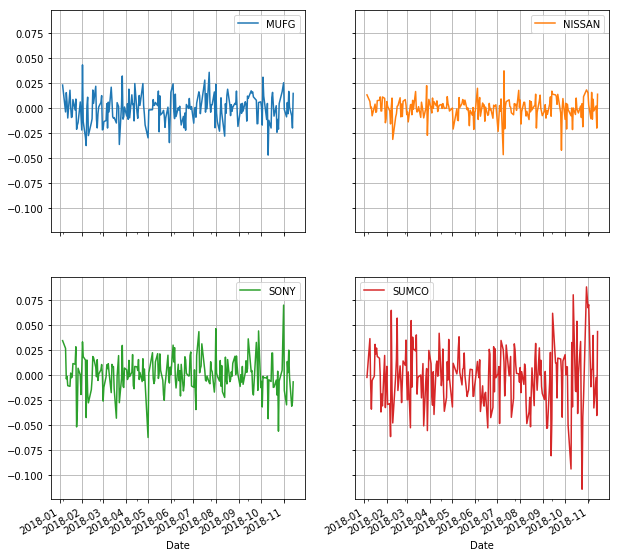

In [14]:
(df_close / df_close.shift(1)).apply(np.log).plot(subplots=True, 
                                                  sharey=True, 
                                                  layout=(2, 2), 
                                                  figsize=(10,10),
                                                 grid=True)

In [15]:
##毎日の変動率（収益率）を時系列に並べ、縦軸を合わせると、どの銘柄が毎日大きく変動するか見える。
## 日産に比べてSUMCOの変動率は非常に大きい事がわかりました。
## 変動率が大きいことを **ボラティリティが高い（ボラタイル）** と表現します。

## 視覚に訴えるグラフは主観が入りやすい
## 客観的にデータを捉える方法を考える。

## describeを使って、毎日の収益率の基本統計量を確認
df_close.pct_change().describe()


Ticker,MUFG,NISSAN,SONY,SUMCO
count,212.000000,212.000000,212.000000,212.000000
mean,-0.000961,-0.000435,0.000646,-0.002391
std,0.014238,0.010319,0.017881,0.029657
min,-0.046042,-0.045649,-0.060556,-0.107969
25%,-0.010014,-0.004970,-0.008534,-0.021131
50%,0.000148,0.000225,0.000159,-0.000938
75%,0.006410,0.005728,0.010781,0.014181
max,0.044103,0.037867,0.072501,0.092237


In [16]:
## 標準偏差(std)に注目
## たとえば、NISSANが1.0％、SUMUCOは2.9％と約３倍違う。
## 日産に比べてSUMUCOは３倍毎日ドキドキしなくてはいけない、と見ることができる。
## ３倍ハイリスクハイリターンとも言えるかもしれない。

## 上記で**ボラティリティが高い（ボラタイル）** という話をしましたが
## それを数字で示した指数をボラティリティと言います。
## ボラティリティは、価格変動の大きさを示す指標で定義はいくつか有りますが、ここでは、
## 収益率データの標準偏差を使うことにします。つまりstd です。

## この std は散らばり具合を表します。
## 散らばり具合とは、ざっくりですが、平均からのどのくらい散らばっているかと考えます。
## そして、この銘柄を取り巻く環境はこれまでと変わらないと仮定して，
## 今後の収益率も， 平均±std の範囲に68.27％の確率で収まる可能性があると考える事にしてしまいます。
## つまり sumco の今後の収益率は、68.27％の確率で以下の範囲に入るでしょう、と考える事にしてしまいます。

sumco = df_close.pct_change().describe()["SUMCO"]
sumco.loc["mean"] - sumco.loc["std"], sumco.loc["mean"] + sumco.loc["std"]


(-0.032047681674932244, 0.027266564516994725)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2473c6e240>,
      dtype=object)

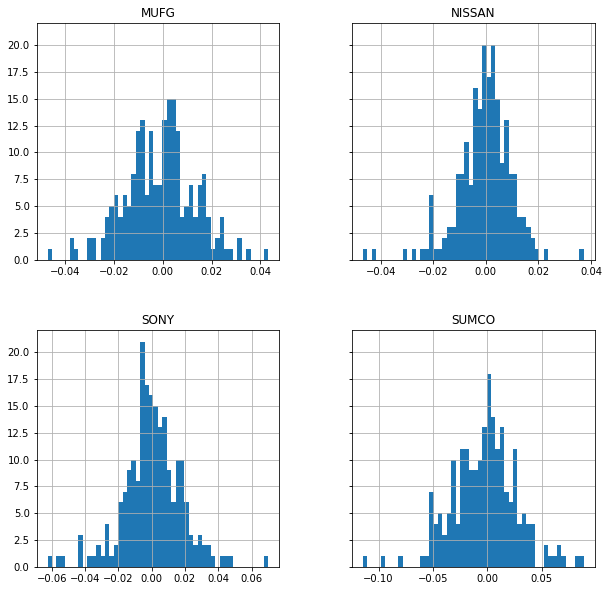

In [17]:
## データのボラティリティを可視化する方法として，ヒストグラム（度数分布表）を描いて観察するという方法があります．
(df_close / df_close.shift(1)).apply(np.log).hist(figsize=(10,10),sharey=True, bins=50)


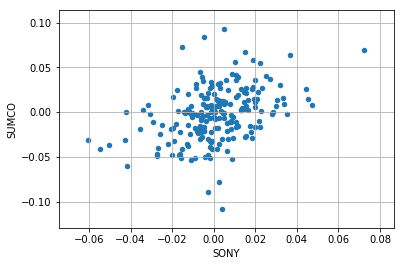

In [18]:
## どのデータもだいたい中心（0付近）が高く、左右に分かれていけば行くほど低くなります。
## しかし端に度数が幾分高いグラフも見受けられます。
## その部分の事をFat Tailとよび、データの特性の推測するためのヒントになります。
## たとえばSUMCOの0.05以上の棒グラフはたくさん立っています。
## これは、典型的なFatTailで、５％以上の値動きが他の銘柄に比べて多かった事がわかります。

## 相関関係
## データ同士の関係を見る
## 例えば、SONYの収益率とSUMCOの収益率の関係
## [注意]　これは、同日の収益率の関係を見ただけで、Sonyが上がればSUMCOが上がるといった関係ではない。

## 相関関係を可視化するには、scatter を使うのが良い
## x軸y軸にそれぞれ比べたい銘柄を入れる。
## 散布図が右肩上がりであれば 正の相関
## 散布図が左肩上がりであれば 負の相関
## があり、正の相関であれば同じ方向に動き、負の相関であれば逆方向に動きやすいという事になる。

df_close.pct_change().plot.scatter(x="SONY", y = "SUMCO", grid=True, )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2478083c88>,
      dtype=object)

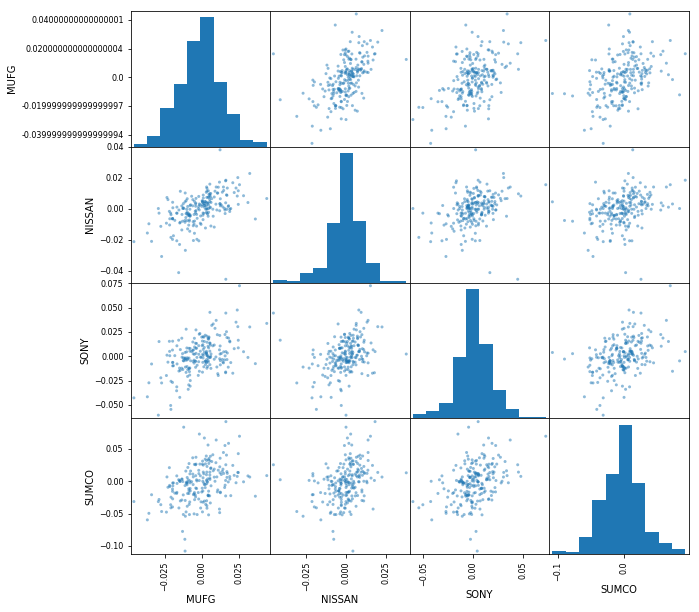

In [19]:
## scatter_matrixを使うと、散布図行列を作成できる
from pandas.plotting import scatter_matrix

scatter_matrix(df_close.pct_change(), figsize=(10,10), grid=True)

相関関係を数値で表現すると、このようになり、取り得る値は-1〜1。

$ r_{xy} = \frac{\displaystyle \sum_{i = 1}^n (x_i - \overline{x})
(y_i - \overline{y})}{\sqrt{\displaystyle \sum_{i = 1}^n 
(x_i - \overline{x})^2}\sqrt{\displaystyle \sum_{i = 1}^n 
(y_i - \overline{y})^2}} $



In [20]:
# 全銘柄の相関関係を出す
# ここから、MUFGとNISSANの相関関係が強く、この2つの銘柄は同日に同じ方向に動く事が多いとわかる。
df_close.pct_change().corr()


Ticker,MUFG,NISSAN,SONY,SUMCO
Ticker,,,,
MUFG,1.000000,0.507950,0.485797,0.395864
NISSAN,0.507950,1.000000,0.328950,0.313592
SONY,0.485797,0.328950,1.000000,0.395903
SUMCO,0.395864,0.313592,0.395903,1.000000
